# _Sprint 11-Tasca 12_ *: Train-Test Splitting* 

In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

import os

pd.set_option('display.max_columns', None)

In [2]:
print(os.getcwd())

/Users/jalpa/Desktop/DataFun/Course_Generalitat/Notebooks


In [3]:
os.chdir("../Data/")
os.listdir()

['county.txt',
 'MLB.txt',
 'FlightDelay_new.csv',
 '.DS_Store',
 'movies.dat',
 'Football',
 'cars.txt',
 'email50.txt',
 'tips.csv',
 'DelayedFlights.csv',
 'FlightDelay_for_Plots.csv',
 'Web_access_log-akumenius.com.txt',
 'RawData',
 'baltimore.csv',
 'weblog_cleaned.csv']

## Level 1 
### Exercise 1

Split the DelayedFlights.csv dataset into train and test. Study the two sets separately, at a descriptive level.

In [36]:
flights = pd.read_csv('DelayedFlights.csv')
flights.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [37]:
flights.drop('Unnamed: 0', axis = 1, inplace = True)

#### Train-test split

    - Let's split the flights data in train and test.
    - I will use the module 'train_test_split' from sci-kit learn.
    - I will do 70-30 splitting: i.e., 70% data in train and 30% data in test.

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(flights, test_size=0.3)
print(train.shape)

(1355730, 29)


In [7]:
print('Shape of the original dataset is:', flights.shape)
print('After 70/30 splitting:')
print('   Shape of the train data is:', train.shape)
print('   Shape of the test data is:', test.shape)

Shape of the original dataset is: (1936758, 29)
After 70/30 splitting:
   Shape of the train data is: (1355730, 29)
   Shape of the test data is: (581028, 29)


#### Train set: descriptive study

In [8]:
print(train.shape)
train.head()

(1355730, 29)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
587874,2008,4,15,2,750.0,740,1139.0,1140,WN,42,N784SW,169.0,180.0,156.0,-1.0,10.0,SLC,MDW,1258,4.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1508469,2008,9,30,2,1514.0,1420,1830.0,1740,AA,1542,N266AA,136.0,140.0,120.0,50.0,54.0,DFW,CMH,927,5.0,11.0,0,N,0,50.0,0.0,0.0,0.0,0.0
233283,2008,2,21,4,2104.0,2000,2240.0,2124,YV,2696,N922FJ,96.0,84.0,52.0,76.0,64.0,SDF,CLT,336,7.0,37.0,0,N,0,0.0,76.0,0.0,0.0,0.0
1119922,2008,7,23,3,1747.0,1735,1959.0,1927,XE,2285,N11155,132.0,112.0,108.0,32.0,12.0,MHT,CLE,544,4.0,20.0,0,N,0,0.0,0.0,20.0,0.0,12.0
743051,2008,5,16,5,2234.0,2125,2344.0,2245,WN,3591,N495WN,70.0,80.0,56.0,59.0,69.0,SMF,LAX,373,7.0,7.0,0,N,0,59.0,0.0,0.0,0.0,0.0


**_Statistical summary of columns_**

I chose following columns where statistical summary may give useful information.

    - AirTime, ArrDelay, DepDelay and Distance
    - CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay

In [9]:
col_of_interest = ['AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

In [10]:
train[col_of_interest].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1349881.00000,1349881.00000,1355730.00000,1355730.00000,873081.00000,873081.00000,873081.00000,873081.00000,873081.00000
mean,108.28157,42.15922,43.14735,765.77065,19.14464,3.69658,15.02860,0.09023,25.28110
std,68.61385,56.79873,53.42170,574.37495,43.51551,21.47860,33.90138,2.04001,41.99824
min,0.00000,-109.00000,6.00000,11.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,58.00000,9.00000,12.00000,338.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,90.00000,24.00000,24.00000,606.00000,2.00000,0.00000,2.00000,0.00000,8.00000
75%,137.00000,56.00000,53.00000,998.00000,21.00000,0.00000,15.00000,0.00000,33.00000
max,1091.00000,2461.00000,2467.00000,4962.00000,2436.00000,1352.00000,1357.00000,392.00000,1303.00000


The following observations can be made from this summary:

For the training dataset, 

- The average time for flights in air is 108 min and the maximum flight time is 1091 minutes. 
- The average distance traveled is 765 miles, and the maximum distance is 4962 miles. 
- The average arrival and departure delays are 56 and 53 minutes, respectively. 
- The minimum times for departure delay is 6 minutes and for arrival delay is -70 minutes. 
- From the remaining columns, we can see that the carrier delays (due to airline) is a major reason for delays (2436), while security related delays lead to least number of flight delays (392). 

**_Missing data per columns_**

To find out how many missing values are present in the data, the built-in function of pandas called "*isnull*" is used. Adding the number of times a missing data is detected over all the rows and columns, we can get total number of missing values. To get the missing values in each column, the detected values are summed once (only over columns).

In [11]:
nan_info=pd.DataFrame(train.dtypes).T.rename(index={0:'column type'})

nan_info=nan_info.append(pd.DataFrame(train.isnull().sum()).T.rename(index={0:'null values (nb)'}))

nan_info=nan_info.append(pd.DataFrame(train.isnull().sum()/train.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
nan_info.T

,column type,null values (nb),null values (%)
Year,int64,0,0
Month,int64,0,0
DayofMonth,int64,0,0
DayOfWeek,int64,0,0
DepTime,float64,0,0
CRSDepTime,int64,0,0
ArrTime,float64,4961,0.365928
CRSArrTime,int64,0,0
UniqueCarrier,object,0,0
FlightNum,int64,0,0


In [13]:
num_cols = train.columns[train.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
num_cols

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

#### Test set: Descriptive study


In [17]:
print(test.shape)
test.head()

(581028, 29)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
433950,2008,3,24,1,1358.0,1351,1626.0,1608,OH,5553,N455CA,88.0,77.0,64.0,18.0,7.0,MKE,CVG,318,2.0,22.0,0,N,0,0.0,7.0,11.0,0.0,0.0
1374590,2008,8,6,3,1008.0,950,1107.0,1055,MQ,4200,N642AE,59.0,65.0,40.0,12.0,18.0,ORD,EVV,273,4.0,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1595312,2008,10,8,3,1222.0,1200,1509.0,1455,MQ,4046,N650MQ,107.0,115.0,93.0,14.0,22.0,ORD,ALB,723,3.0,11.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1262633,2008,7,11,5,832.0,820,1331.0,1327,DL,816,N629DL,179.0,187.0,160.0,4.0,12.0,ABQ,ATL,1269,6.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN
52393,2008,1,2,3,2001.0,1910,2328.0,2242,OO,6604,N702SK,147.0,152.0,124.0,46.0,51.0,DEN,BHM,1082,3.0,20.0,0,N,0,0.0,0.0,0.0,0.0,46.0


Statistical summary of columns

I chose the same columns as for the training dataset.

- AirTime, ArrDelay, DepDelay and Distance
- CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay

In [18]:
test[col_of_interest].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,578490.00000,578490.00000,581028.00000,581028.00000,374407.00000,374407.00000,374407.00000,374407.00000,374407.00000
mean,108.26684,42.29477,43.27344,765.48902,19.26045,3.71987,15.00540,0.08993,25.33230
std,68.70974,56.75193,53.35761,574.72434,43.61767,21.52623,33.67321,1.98181,42.18663
min,0.00000,-69.00000,6.00000,24.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,58.00000,9.00000,12.00000,338.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,90.00000,24.00000,24.00000,606.00000,2.00000,0.00000,2.00000,0.00000,8.00000
75%,137.00000,56.00000,53.00000,997.00000,21.00000,0.00000,15.00000,0.00000,33.00000
max,652.00000,1655.00000,1597.00000,4962.00000,1369.00000,1080.00000,1195.00000,229.00000,1316.00000


The following observations can be made from this summary:

For the test dataset,

- The average time for flights in air is 68 min and the maximum flight time is 1091 minutes.
- The average distance traveled is 765 miles, and the maximum distance is 4962 miles.
- The average arrival and departure delays are 42 and 43 minutes, respectively.
- The minimum times for departure delay is 6 minutes and for arrival delay is -109 minutes.
- From the remaining columns, we can see that the carrier delays (due to airline) is a major reason for delays (1297), while security related delays lead to least number of flight delays (357).

**_Missing data per columns_**

To find out how many missing values are present in the data, the built-in function of pandas called "*isnull*" is used. Adding the number of times a missing data is detected over all the rows and columns, we can get total number of missing values. To get the missing values in each column, the detected values are summed once (only over columns).

In [19]:
nan_info=pd.DataFrame(test.dtypes).T.rename(index={0:'column type'})

nan_info=nan_info.append(pd.DataFrame(test.isnull().sum()).T.rename(index={0:'null values (nb)'}))

nan_info=nan_info.append(pd.DataFrame(test.isnull().sum()/test.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
nan_info.T

,column type,null values (nb),null values (%)
Year,int64,0,0
Month,int64,0,0
DayofMonth,int64,0,0
DayOfWeek,int64,0,0
DepTime,float64,0,0
CRSDepTime,int64,0,0
ArrTime,float64,2149,0.369862
CRSArrTime,int64,0,0
UniqueCarrier,object,0,0
FlightNum,int64,0,0


#### Box plots of train and test data

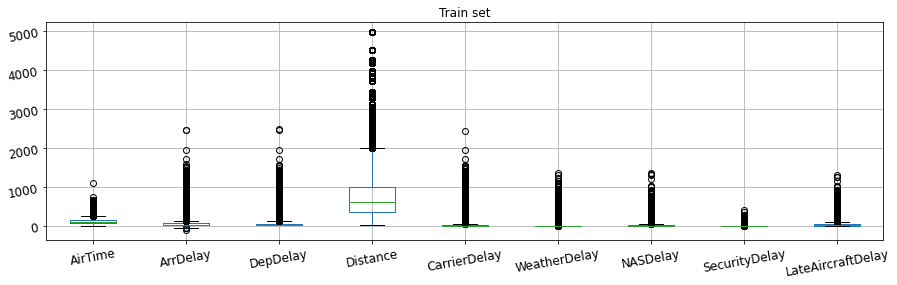

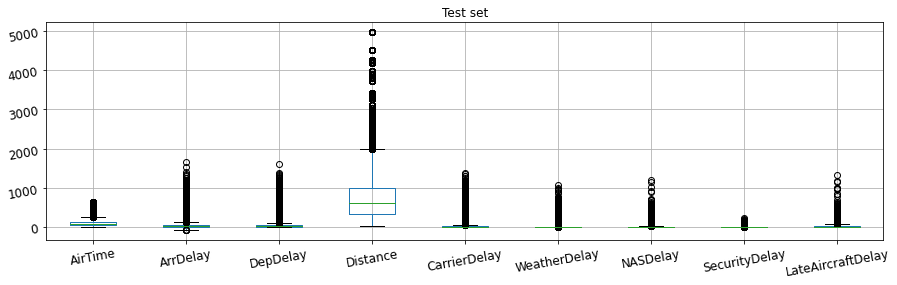

In [32]:
plt.figure(figsize=(15, 4))
boxplot = train.boxplot(column=col_of_interest)
plt.tick_params(axis='both', which='major', rotation=10, labelsize=12)
plt.title('Train set')

plt.figure(figsize=(15, 4))
boxplot = test.boxplot(column=col_of_interest)
plt.tick_params(axis='both', which='major', rotation=10, labelsize=12)
plt.title('Test set')
plt.show()

## Level 2
### Exercises 2

Apply some transformation process (standardize numerical data, create dummy columns, polynomials ...).


### Standardizing numerical data

Let's first check what are the numerical columns in the data.

In [48]:
flights_n = flights.copy()
num_cols = flights.columns[flights_n.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
flights_n.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Standardizing for this dataset needs to be done a little carefully, because: 

    - Some of the column with numerical dtype have data relating to time stamps. 
    - Standardizing year or month values is not "correct". 
    - DepTime and ArrTime seems like numerical values but are actually hhmm. (e.g., 2003 is 20:03)
    - Some other columns such as TailNum and FlightNum also does not need standardizing given that they are flight identifiers.

Therefore, 
I chose following columns to standardize: 

- ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, Distance, TaxiIn, TaxiOut

In [49]:
cols_standardise = ['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
flights_n[cols_standardise] = scaler.fit_transform(flights_n[cols_standardise])
flights_n.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,-0.073631,0.220030,0.112508,-0.989701,-0.658868,IAD,TPA,0.077137,-0.533408,-0.713616,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,-0.073631,0.149945,0.068804,-0.707935,-0.452885,IAD,TPA,0.077137,-0.343784,-0.574132,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,-0.517705,-0.620996,-0.470220,-0.496611,-0.658868,IND,BWI,-0.436371,-0.723032,-0.085936,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,-0.600969,-0.620996,-0.455652,-0.144403,-0.171999,IND,BWI,-0.436371,-0.723032,-0.574132,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,-0.448319,-0.270569,-0.309970,-0.549442,-0.340531,IND,JAX,-0.135229,-0.533408,-0.574132,0,N,0,NaN,NaN,NaN,NaN,NaN


### Dummy variables

    - Creating dummy variables in 'flights_n' dataset, that has standardized numerical columns of interest.
    - columns to create dummy variables for are: Month, UniqueCarrier    

In [52]:
flights_dummy = flights_n.copy()
dummy_m = pd.get_dummies(flights_dummy['Month'])
dummy_uc = pd.get_dummies(flights_dummy['UniqueCarrier'])

flights_dummy = flights_dummy.merge(dummy_m, left_index=True, right_index=True)
flights_dummy = flights_dummy.merge(dummy_uc, left_index=True, right_index=True)
flights_dummy.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,1,2,3,4,5,6,7,8,9,10,11,12,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,-0.073631,0.220030,0.112508,-0.989701,-0.658868,IAD,TPA,0.077137,-0.533408,-0.713616,0,N,0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,-0.073631,0.149945,0.068804,-0.707935,-0.452885,IAD,TPA,0.077137,-0.343784,-0.574132,0,N,0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,-0.517705,-0.620996,-0.470220,-0.496611,-0.658868,IND,BWI,-0.436371,-0.723032,-0.085936,0,N,0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,-0.600969,-0.620996,-0.455652,-0.144403,-0.171999,IND,BWI,-0.436371,-0.723032,-0.574132,0,N,0,2.0,0.0,0.0,0.0,32.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,-0.448319,-0.270569,-0.309970,-0.549442,-0.340531,IND,JAX,-0.135229,-0.533408,-0.574132,0,N,0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Level 3
### Exercises 3

Summarize the new columns generated statistically and graphically.

In [58]:
flights_n[cols_standardise].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
count,1928371.00000,1936560.00000,1928371.00000,1928371.00000,1936758.00000,1936758.00000,1929648.00000,1936303.00000
mean,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
min,-1.65565,-2.23296,-1.57740,-2.66269,-0.69632,-1.31369,-1.29190,-1.27155
25%,-0.73974,-0.73313,-0.73245,-0.58466,-0.58396,-0.74448,-0.53341,-0.57413
50%,-0.24016,-0.25655,-0.26627,-0.32051,-0.35926,-0.27797,-0.15416,-0.29516
75%,0.43983,0.43029,0.41844,0.24303,0.18379,0.40439,0.22509,0.19303
max,13.60940,7.36875,14.31652,42.59598,45.38768,7.30455,44.21786,28.15964
